Recherche du symbole boursier d'une entreprise via Google

In [ ]:
from googlesearch import search

def trouver_symbole_via_google(nom_entreprise):
    query = f"{nom_entreprise} stock symbol"
    for j in search(query, num=10, stop=10, pause=2):
        if "finance.yahoo.com/quote/" in j:
            start = j.find('quote/') + 6
            end = j.find('?', start)
            if end != -1:
                return j[start:end].rstrip('/')
            else:
                return j[start:].rstrip('/')
    return None

def main():
    nom_entreprise = input("Entrez le nom de l'entreprise : ")
    symbole_trouve = trouver_symbole_via_google(nom_entreprise)
    if symbole_trouve:
        print(f"Le symbole boursier pour {nom_entreprise} est : {symbole_trouve}")
    else:
        print(f"Aucun symbole trouvé pour {nom_entreprise}")

if __name__ == "__main__":
    main()

Entrez le nom de l'entreprise : apple
Le symbole boursier pour apple est : AAPL


Analyse de la corrélation entre les rendements d'une action et Bitcoin

Enter the stock ticker: aapl
Enter the start date (YYYY-MM-DD): 2019-01-01
Enter the end date (YYYY-MM-DD): 2023-01-01
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Correlation coefficient between aapl and Bitcoin: 0.27401741962372217
Correlation strength: Positive: Weak


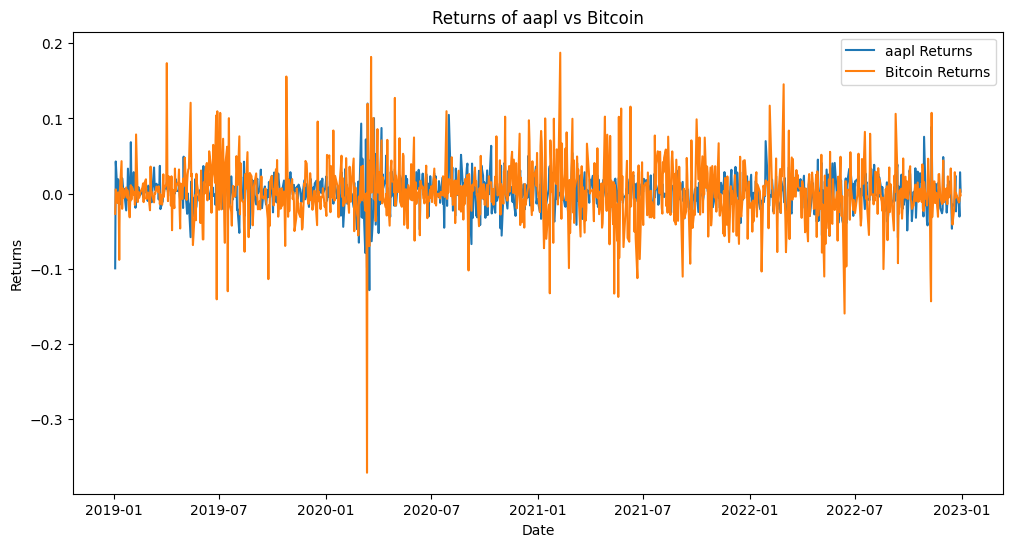

In [ ]:
import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def get_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data['Adj Close']

def get_bitcoin_data(start_date, end_date):
    bitcoin_data = yf.download('BTC-USD', start=start_date, end=end_date)
    return bitcoin_data['Adj Close']

def calculate_returns(data):
    return (data / data.shift(1)) - 1

def categorize_correlation(correlation_coefficient):
    if 0 <= correlation_coefficient < 0.3:
        return "Positive: Weak"
    elif 0.3 <= correlation_coefficient < 0.5:
        return "Positive: Moderate"
    elif 0.5 <= correlation_coefficient <= 1:
        return "Positive: Strong"
    elif 0 >= correlation_coefficient >= -0.3:
        return "Negative: Weak"
    elif -0.3 >= correlation_coefficient >= -0.5:
        return "Negative: Moderate"
    elif -0.5 >= correlation_coefficient >= -1:
        return "Negative: Strong"
    else:
        return "Undefined"

def plot_data(stock_returns, bitcoin_returns, ticker):
    plt.figure(figsize=(12, 6))
    plt.plot(stock_returns, label=f"{ticker} Returns")
    plt.plot(bitcoin_returns, label="Bitcoin Returns")
    plt.legend()
    plt.title(f"Returns of {ticker} vs Bitcoin")
    plt.xlabel("Date")
    plt.ylabel("Returns")
    plt.show()

def main():
    ticker = input("Enter the stock ticker: ")
    start_date = input("Enter the start date (YYYY-MM-DD): ")
    end_date = input("Enter the end date (YYYY-MM-DD): ")

    try:
        stock_data = get_stock_data(ticker, start_date, end_date)
        bitcoin_data = get_bitcoin_data(start_date, end_date)

        if stock_data.empty or bitcoin_data.empty:
            print("Error: No data available for correlation calculation.")
            return None, None, None

        returns_stock = calculate_returns(stock_data).dropna()
        returns_bitcoin = calculate_returns(bitcoin_data).dropna()

        common_dates = returns_stock.index.intersection(returns_bitcoin.index)
        if len(common_dates) == 0:
            print("Error: No overlapping dates for correlation calculation.")
            return None, None, None

        returns_stock = returns_stock.loc[common_dates]
        returns_bitcoin = returns_bitcoin.loc[common_dates]

        correlation_coefficient = np.corrcoef(returns_stock, returns_bitcoin)[0, 1]
        print(f"Correlation coefficient between {ticker} and Bitcoin: {correlation_coefficient}")

        correlation_strength = categorize_correlation(correlation_coefficient)
        print(f"Correlation strength: {correlation_strength}")

        plot_data(returns_stock, returns_bitcoin, ticker)

        return returns_stock, returns_bitcoin, correlation_coefficient

    except Exception as e:
        print(f"An error occurred: {e}")
        return None, None, None

if __name__ == "__main__":
    returns_stock, returns_bitcoin, correlation_coefficient = main()


Prédiction optimisée des rendements boursiers avec un réseau de neurones artificiels (MLP)

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.01, 'beta_1': 0.9, 'beta_2': 0.999, 'epsilon': 1e-07, 'hidden_layer_sizes': (100,), 'learning_rate_init': 0.01, 'solver': 'adam'}
Root Mean Squared Error: 0.023263118620672034


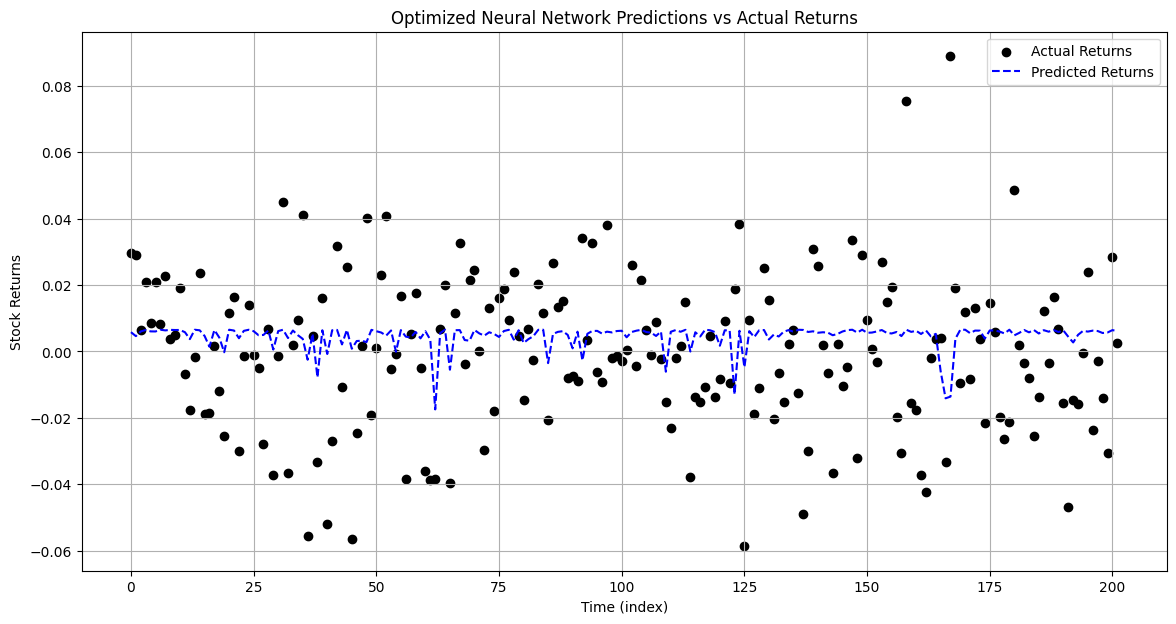

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

X = returns_bitcoin.values.reshape(-1, 1)
y = returns_stock.values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

test_size = 0.2
split_index = int(len(X_scaled) * (1 - test_size))
X_train, X_test = X_scaled[:split_index], X_scaled[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

tscv = TimeSeriesSplit(n_splits=5)

nn_model = MLPRegressor(random_state=42, max_iter=1000, early_stopping=True, validation_fraction=0.1, n_iter_no_change=10)

parameter_space = {
    'hidden_layer_sizes': [(50, 50), (100, 50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01],
    'beta_1': [0.9, 0.95],
    'beta_2': [0.999, 0.99],
    'epsilon': [1e-7, 1e-8]
}

clf = GridSearchCV(nn_model, parameter_space, n_jobs=-1, cv=tscv, scoring='neg_mean_squared_error')
clf.fit(X_train, y_train)

best_params = clf.best_params_
print('Best parameters found:\n', best_params)

y_pred = clf.predict(X_test)

rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Root Mean Squared Error: {rmse}")

plt.figure(figsize=(14, 7))

plt.scatter(range(len(y_test)), y_test, color='black', label='Actual Returns')
plt.plot(range(len(y_test)), y_pred, color='blue', label='Predicted Returns', linestyle='--')
plt.title('Optimized Neural Network Predictions vs Actual Returns')
plt.xlabel('Time (index)')
plt.ylabel('Stock Returns')
plt.legend()
plt.grid(True)
plt.show()
